In [83]:
import urllib.request
import urllib.request
import json
import pandas as pd
import json

client_id = "NjCkeE5n21b4IPWLlbAi"
client_secret = "J6RWn6YJz8"

# ✨ 필요한 입력값
start_date = "2024-06-23"
end_date = "2025-06-23"
keywords = ["상지건설"]

# 🔧 요청 body 구성
body = {
    "startDate": start_date,
    "endDate": end_date,
    "timeUnit": "date",
    "keywordGroups": [
        {
            "groupName": keywords[0],
            "keywords": keywords
        }
    ],
    "device": "pc"
}

# 🔗 API 요청
url = "https://openapi.naver.com/v1/datalab/search"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)
request.add_header("Content-Type", "application/json")

response = urllib.request.urlopen(request, data=json.dumps(body).encode("utf-8"))
rescode = response.getcode()

# 📦 결과 확인
if rescode == 200:
    response_body = response.read()
else:
    print("Error Code:" + str(rescode))

# 네이버 API 응답 결과를 문자열로 받은 경우 (예: response_body.decode('utf-8'))
response_text = response_body.decode('utf-8')  # 너가 올린 JSON 문자열을 여기에 붙여넣거나 response_body.decode('utf-8') 대입

# JSON 문자열을 파이썬 객체로 변환
data_json = json.loads(response_text)

# 관심 데이터 추출
data_list = data_json['results'][0]['data']  # 첫 번째 키워드 그룹의 데이터

# DataFrame 생성
df = pd.DataFrame(data_list)

# 'period'를 datetime 형식으로 변환하고 인덱스로 지정
df['날짜'] = pd.to_datetime(df['period'])
df.drop(columns='period', inplace=True)
df.set_index('날짜', inplace=True)

df.head(3)

,ratio
날짜,
2024-06-23,0.02636
2024-06-24,0.10254
2024-06-25,0.15821


In [ ]:
# from pykrx import stock
# import pandas as pd
# from datetime import datetime, timedelta
# def get_daily_returns(ticker, start_date="2022-01-01", end_date=None, save_csv=True):
#     """
#     한국 주식 티커의 일일 수익률을 계산하여 DataFrame 및 CSV로 저장합니다.
#     Parameters:
#     - ticker: str, 예: "005930" (삼성전자)
#     - start_date: str, "YYYY-MM-DD"
#     - end_date: str, "YYYY-MM-DD" (기본: 오늘)
#     - save_csv: bool, True면 CSV로 저장
#     Returns:
#     - DataFrame: 날짜별 수익률 포함
#     """
#     if end_date is None:
#         end_date = datetime.today().strftime("%Y-%m-%d")
#     # 1. 일별 OHLCV 데이터 가져오기
#     df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
#     # 2. 수익률 계산 (전일 대비 수익률)
#     df['Return'] = df['종가'].pct_change()
#     # 3. 날짜 인덱스 리셋
#     df.reset_index(inplace=True)
#     # 4. 필요한 컬럼만 정리
#     df = df[['날짜', '종가', 'Return']]
#     # 5. 저장
#     if save_csv:
#         filename = f"{ticker}_daily_returns.csv"
#         df.to_csv(filename, index=False)
#         print(f"[✓] Saved to {filename}")
#     return df

# df1 = get_daily_returns("005930",start_date="2024-06-21")
# df1.head(3)

[✓] Saved to 005930_daily_returns.csv


,날짜,종가,Return
0,2024-06-21,80000,NaN
1,2024-06-24,80600,0.007500
2,2024-06-25,80800,0.002481


In [84]:
from pykrx import stock
import pandas as pd
from datetime import datetime

def get_daily_returns(ticker, start_date="2022-01-01", end_date=None, save_csv=True):
    """
    한국 주식 티커의 일일 수익률을 계산하여 DataFrame 및 CSV로 저장합니다.
    Parameters:
    - ticker: str, 예: "005930" (삼성전자)
    - start_date: str, "YYYY-MM-DD"
    - end_date: str, "YYYY-MM-DD" (기본: 오늘)
    - save_csv: bool, True면 CSV로 저장
    Returns:
    - DataFrame: 날짜별 수익률 포함
    """
    if end_date is None:
        end_date = datetime.today().strftime("%Y-%m-%d")
    # 1. 일별 OHLCV 데이터 가져오기
    df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
    # 2. 2일 뒤 종가 대비 수익률 계산
    df['Return'] = df['종가'].shift(1) / df['종가'] - 1
    # 3. 날짜 인덱스 리셋
    df.reset_index(inplace=True)
    # 4. 필요한 컬럼만 정리
    df = df[['날짜', '종가', 'Return']]
    # 5. 저장
    if save_csv:
        filename = f"{ticker}_2days_later_return.csv"
        df.to_csv(filename, index=False)
        print(f"[✓] Saved to {filename}")
    return df

df1 = get_daily_returns("042940", start_date="2024-06-21")
print(df1.tail(3))

[✓] Saved to 042940_2days_later_return.csv
            날짜     종가    Return
239 2025-06-19  14640  0.060109
240 2025-06-20  13810  0.060101
241 2025-06-23  13250  0.042264


In [85]:
df_reset = df.reset_index()

# 2. 날짜 컬럼 형식 통일 (datetime)
df_reset['날짜'] = pd.to_datetime(df_reset['날짜'])
df1['날짜'] = pd.to_datetime(df1['날짜'])

# 3. 날짜 기준으로 병합 (inner join)
df2 = pd.merge(df1, df_reset, on='날짜', how='inner')

df2.tail(3)

,날짜,종가,Return,ratio
237,2025-06-18,15520,-0.005155,2.91532
238,2025-06-19,14640,0.060109,2.42894
239,2025-06-20,13810,0.060101,2.65748


✅ 시차별 상관관계:
     Lag  Correlation
0    -3     0.451259
1    -2     0.495707
2    -1     0.555941
3     0     0.592895
4     1     0.493656
5     2     0.430028
6     3     0.382108
7     4     0.293797
8     5     0.326348
9     6     0.294256
10    7     0.214569

🎯 가장 높은 상관관계: lag 0일, 상관계수 = 0.5929


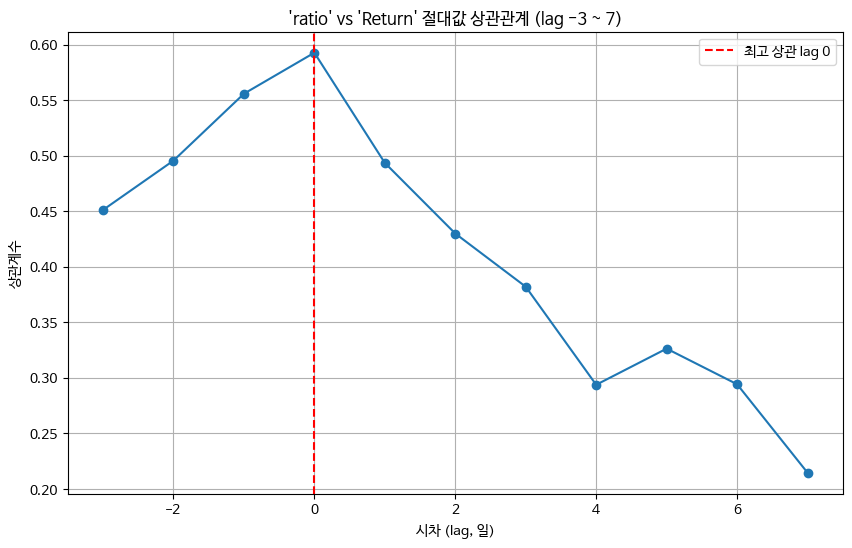

(    Lag  Correlation
 0    -3     0.451259
 1    -2     0.495707
 2    -1     0.555941
 3     0     0.592895
 4     1     0.493656
 5     2     0.430028
 6     3     0.382108
 7     4     0.293797
 8     5     0.326348
 9     6     0.294256
 10    7     0.214569,
 Lag            0.000000
 Correlation    0.592895
 Name: 3, dtype: float64)

In [86]:
def lagged_correlation_analysis_return_ratio(df, ratio_col='ratio', return_col='Return', date_col='날짜', min_lag=-3, max_lag=7):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])

    lag_results = []

    for lag in range(min_lag, max_lag + 1):
        temp_df = df.copy()

        # 시차에 따라 Return 절대값 시프트 (음수 lag: 과거 시점, 양수 lag: 미래 시점)
        temp_df[f'{return_col}_lag_{lag}'] = temp_df[return_col].shift(-lag).abs()
        
        # ratio, shifted Return 둘 다 결측치 제거
        clean_df = temp_df.dropna(subset=[ratio_col, f'{return_col}_lag_{lag}'])

        corr = clean_df[ratio_col].corr(clean_df[f'{return_col}_lag_{lag}'])
        lag_results.append({'Lag': lag, 'Correlation': corr})

    lag_corr_df = pd.DataFrame(lag_results)

    best_row = lag_corr_df.loc[lag_corr_df['Correlation'].abs().idxmax()]

    print("✅ 시차별 상관관계:\n", lag_corr_df)
    print(f"\n🎯 가장 높은 상관관계: lag {int(best_row['Lag'])}일, 상관계수 = {best_row['Correlation']:.4f}")

    plt.figure(figsize=(10,6))
    plt.plot(lag_corr_df['Lag'], lag_corr_df['Correlation'], marker='o', linestyle='-')
    plt.axvline(best_row['Lag'], color='red', linestyle='--', label=f"최고 상관 lag {int(best_row['Lag'])}")
    plt.title(f"'{ratio_col}' vs '{return_col}' 절대값 상관관계 (lag {min_lag} ~ {max_lag})")
    plt.xlabel("시차 (lag, 일)")
    plt.ylabel("상관계수")
    plt.legend()
    plt.grid(True)
    plt.show()

    return lag_corr_df, best_row

lagged_correlation_analysis_return_ratio(df2, ratio_col='ratio', return_col='Return', date_col='날짜', min_lag=-3, max_lag=7)

In [87]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime, timedelta
import time

def generate_date_range(start_date: str, end_date: str) -> list:
    """날짜 범위 생성 함수"""
    start = datetime.strptime(start_date, "%Y.%m.%d")
    end = datetime.strptime(end_date, "%Y.%m.%d")
    return [(start + timedelta(days=i)).strftime("%Y.%m.%d") for i in range((end - start).days + 1)]

def get_all_posts_by_date_range(code, start_date, end_date, page_step=10, max_limit=100):
    """네이버 금융 게시글 크롤링 함수"""
    target_dates = set(generate_date_range(start_date, end_date))
    base_url = "https://finance.naver.com"
    headers = {'User-Agent': 'Mozilla/5.0'}
    filtered_data = []
    collected_dates = set()
    current_page = 1
    max_page = page_step

    while not target_dates.issubset(collected_dates):
        new_data_found = False  # 새 글 탐지 여부
        for page in range(current_page, max_page + 1):
            list_url = f"{base_url}/item/board.naver?code={code}&page={page}"
            res = requests.get(list_url, headers=headers)
            res.encoding = 'euc-kr'
            soup = BeautifulSoup(res.text, 'html.parser')

            rows = soup.select("table.type2 tr")
            date_tags = soup.select("span.tah.p10.gray03")
            raw_texts = [span.get_text(strip=True) for span in date_tags]
            dates_only = [raw_texts[i].split()[0] for i in range(0, len(raw_texts), 2)]

            if not dates_only:
                print(f":warning: 페이지 {page}에서 더 이상 게시글 없음. 종료합니다.")
                return pd.DataFrame(filtered_data)

            date_index = 0
            for row in rows:
                tds = row.find_all("td")
                if len(tds) < 5:
                    continue

                a_tag = tds[1].find("a")
                if not a_tag or not a_tag.has_attr('href'):
                    continue

                title = a_tag['title']
                href = a_tag['href']
                detail_url = base_url + href

                if date_index >= len(dates_only):
                    continue

                post_date = dates_only[date_index]
                date_index += 1

                if post_date in target_dates:
                    new_data_found = True
                    post_res = requests.get(detail_url, headers=headers)
                    post_res.encoding = 'euc-kr'
                    post_soup = BeautifulSoup(post_res.text, 'html.parser')
                    content_div = post_soup.select_one("div.view_se")
                    content = content_div.get_text(strip=True) if content_div else "본문 없음"

                    filtered_data.append({
                        "날짜": post_date,
                        "제목": title,
                        "본문": content,
                        "링크": detail_url
                    })

                    collected_dates.add(post_date)
                    time.sleep(0.1)

        if not new_data_found:
            print(":white_check_mark: 더 이상 수집할 새로운 데이터 없음. 종료합니다.")
            break

        current_page = max_page + 1
        max_page += page_step

        if max_page > max_limit:
            print(f":no_entry_sign: 최대 페이지 제한({max_limit}) 도달. 중단합니다.")
            break

    return pd.DataFrame(filtered_data)

def save_crawled_data(df, code, start_date, end_date):
    """크롤링된 데이터를 파일로 저장"""
    filename = f"crawled_data_{code}_{start_date.replace('.', '')}_{end_date.replace('.', '')}.csv"
    df.to_csv(filename, index=False, encoding='utf-8-sig')
    print(f"크롤링 데이터가 {filename}에 저장되었습니다.")
    return filename

if __name__ == "__main__":
    print("=== 네이버 금융 게시글 크롤러 ===")
    
    code = input("종목 코드를 입력하세요 (예: 005930): ").strip()
    start_date = input("시작 날짜를 입력하세요 (예: 2025.06.20): ").strip()
    end_date = input("끝 날짜를 입력하세요 (예: 2025.06.23): ").strip()

    print(f"\n{code} 종목의 {start_date} ~ {end_date} 기간 게시글을 크롤링합니다...")
    
    df = get_all_posts_by_date_range(code, start_date, end_date)
    
    if not df.empty:
        filename = save_crawled_data(df, code, start_date, end_date)
        print(f"\n크롤링 완료! 총 {len(df)}개의 게시글을 수집했습니다.")
        print(f"파일명: {filename}")
    else:
        print("크롤링된 데이터가 없습니다.") 

=== 네이버 금융 게시글 크롤러 ===

042940 종목의 2025.06.05 ~ 2025.06.23 기간 게시글을 크롤링합니다...
:no_entry_sign: 최대 페이지 제한(100) 도달. 중단합니다.
크롤링 데이터가 crawled_data_042940_20250605_20250623.csv에 저장되었습니다.

크롤링 완료! 총 1863개의 게시글을 수집했습니다.
파일명: crawled_data_042940_20250605_20250623.csv


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import os
from tqdm import tqdm

# 한글 폰트 설정
import matplotlib.font_manager as fm

def setup_korean_font():
    """한글 폰트 설정"""
    import warnings
    warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
    
    # Windows에서 한글 폰트 찾기
    font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
    
    # 한글 폰트 우선순위
    korean_fonts = [
        'Malgun Gothic',  # 맑은 고딕
        'NanumGothic',    # 나눔고딕
        'NanumBarunGothic', # 나눔바른고딕
        'Dotum',          # 돋움
        'Batang',         # 바탕
        'Gulim'           # 굴림
    ]
    
    # 시스템에 설치된 한글 폰트 찾기
    available_fonts = []
    for font in font_list:
        try:
            font_name = fm.FontProperties(fname=font).get_name()
            if any(kf in font_name for kf in korean_fonts):
                available_fonts.append(font)
        except:
            continue
    
    # 한글 폰트 설정
    if available_fonts:
        # matplotlib 설정
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Malgun Gothic', 'NanumGothic', 'NanumBarunGothic', 'Dotum', 'Batang', 'Gulim']
        plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
        
        # seaborn 설정
        sns.set(font='Malgun Gothic', font_scale=1.2)
        sns.set_style("whitegrid")
        
        print(f"한글 폰트 설정 완료: {available_fonts[0]}")
    else:
        # 한글 폰트가 없으면 기본 설정
        plt.rcParams['font.family'] = 'DejaVu Sans'
        print("한글 폰트를 찾을 수 없어 기본 폰트를 사용합니다.")

# 한글 폰트 설정 실행
setup_korean_font()

class KoreanSentimentAnalyzer:
    def __init__(self, model_name="klue/roberta-base"):
        """한국어 감성분석기 초기화"""
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        print(f"사용 중인 디바이스: {self.device}")
        
        # 모델과 토크나이저 로드
        print("감성분석 모델을 로딩 중입니다...")
        self.tokenizer = AutoTokenizer.from_pretrained(model_name)
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name)
        self.model.to(self.device)
        self.model.eval()
        
        # 감성 레이블 매핑 (모델에 따라 다를 수 있음)
        if "klue" in model_name.lower():
            # KLUE 모델은 보통 2클래스 (긍정/부정) 또는 3클래스
            self.id2label = {0: "부정", 1: "긍정"}
            self.label2id = {"부정": 0, "긍정": 1}
        elif "kcelectra" in model_name.lower():
            self.id2label = {0: "부정", 1: "중립", 2: "긍정"}
            self.label2id = {"부정": 0, "중립": 1, "긍정": 2}
        else:
            # 기본 3클래스 분류
            self.id2label = {0: "부정", 1: "중립", 2: "긍정"}
            self.label2id = {"부정": 0, "중립": 1, "긍정": 2}
        
        print("모델 로딩 완료!")
        print(f"사용 중인 모델: {model_name}")

    def clean_text(self, text):
        """텍스트 정제 함수"""
        if pd.isna(text) or text == "본문 없음":
            return ""
        
        # 특수문자 제거 (한글, 영문, 숫자, 공백만 유지)
        text = re.sub(r'[^\w\s가-힣]', '', str(text))
        # 여러 공백을 하나로
        text = re.sub(r'\s+', ' ', text)
        return text.strip()

    def analyze_sentiment(self, text, max_length=512):
        """감성분석"""
        if not text or text == "본문 없음":
            return "중립", 0.0, 0.0
        
        # 텍스트 정제
        cleaned_text = self.clean_text(text)
        
        if not cleaned_text:
            return "중립", 0.0, 0.0
        
        try:
            # 토크나이징
            inputs = self.tokenizer(
                cleaned_text,
                truncation=True,
                max_length=max_length,
                padding=True,
                return_tensors="pt"
            )
            
            # GPU로 이동
            inputs = {k: v.to(self.device) for k, v in inputs.items()}
            
            # 추론
            with torch.no_grad():
                outputs = self.model(**inputs)
                logits = outputs.logits
                probabilities = torch.softmax(logits, dim=1)
            
            # 결과 처리
            predicted_class = torch.argmax(logits, dim=1).item()
            confidence = probabilities[0][predicted_class].item()
            
            sentiment_label = self.id2label[predicted_class]
            
            # 감성 점수 계산 (모델에 따라 다름)
            if len(self.id2label) == 2:  # 2클래스 (긍정/부정)
                if sentiment_label == "긍정":
                    sentiment_score = confidence
                else:  # 부정
                    sentiment_score = -confidence
            else:  # 3클래스 (긍정/중립/부정)
                if sentiment_label == "긍정":
                    sentiment_score = confidence
                elif sentiment_label == "부정":
                    sentiment_score = -confidence
                else:  # 중립
                    sentiment_score = 0.0
            
            return sentiment_label, sentiment_score, confidence
            
        except Exception as e:
            print(f"감성분석 중 오류 발생: {e}")
            return "중립", 0.0, 0.0

    def extract_keywords(self, text, min_length=2):
        """키워드 추출 함수"""
        if not text or text == "본문 없음":
            return []
        
        # 텍스트 정제
        cleaned_text = self.clean_text(text)
        
        # 단어 분리 (한글, 영문, 숫자)
        words = re.findall(r'[가-힣a-zA-Z0-9]+', cleaned_text)
        
        # 길이 필터링 및 불용어 제거
        stop_words = {
            '이', '그', '저', '것', '수', '등', '때', '곳', '말', '일', '년', '월', '일', '시', '분', '초',
            '있다', '없다', '하다', '되다', '그렇다', '아니다', '이다',
            '위', '아래', '앞', '뒤', '왼쪽', '오른쪽', '안', '밖', '안쪽', '바깥쪽', '위쪽', '아래쪽',
            '이번', '저번', '다음', '이전', '현재', '지금', '오늘', '어제', '내일', '모레', '글피',
            '그리고', '또는', '하지만', '그런데', '그러나', '따라서', '그래서', '그러면', '만약',
            '이미', '아직', '벌써', '곧', '곧바로', '바로', '즉시', '당장', '지금', '현재'
        }
        filtered_words = [word for word in words if len(word) >= min_length and word not in stop_words]
        
        return filtered_words

    def analyze_sentiment_from_file(self, filename):
        """저장된 파일에서 감성분석 수행"""
        print(f"{filename} 파일에서 감성분석을 시작합니다...")
        
        if not os.path.exists(filename):
            print(f"파일을 찾을 수 없습니다: {filename}")
            return None
        
        df = pd.read_csv(filename, encoding='utf-8-sig')
        
        # 감성분석 수행
        sentiments = []
        scores = []
        confidences = []
        keywords_list = []
        
        for idx, row in tqdm(df.iterrows(), total=len(df), desc="감성분석 진행률"):
            sentiment_label, sentiment_score, confidence = self.analyze_sentiment(row['본문'])
            keywords = self.extract_keywords(row['본문'])
            
            sentiments.append(sentiment_label)
            scores.append(sentiment_score)
            confidences.append(confidence)
            keywords_list.append(keywords)
        
        # 결과 추가
        df['감성'] = sentiments
        df['감성점수'] = scores
        df['신뢰도'] = confidences
        df['키워드'] = keywords_list
        
        # 분석 결과 저장
        analysis_filename = filename.replace('.csv', '_with_korean_sentiment.csv')
        df.to_csv(analysis_filename, index=False, encoding='utf-8-sig')
        print(f"감성분석 결과가 {analysis_filename}에 저장되었습니다.")
        
        return df

    def generate_detailed_analysis(self, df):
        """상세한 분석 결과 생성"""
        print("\n" + "="*60)
        print("📊 한국어 감성분석 상세 결과")
        print("="*60)
        
        # 1. 전체 감성분석 요약
        print("\n1️⃣ 전체 감성분석 요약")
        sentiment_counts = df['감성'].value_counts()
        print(sentiment_counts)
        print(f"평균 감성점수: {df['감성점수'].mean():.3f}")
        print(f"평균 신뢰도: {df['신뢰도'].mean():.3f}")
        
        # 2. 날짜별 감성분석
        print("\n2️⃣ 날짜별 감성분석")
        daily_sentiment = df.groupby('날짜').agg({
            '감성점수': ['mean', 'count'],
            '신뢰도': 'mean',
            '감성': lambda x: x.value_counts().to_dict()
        }).round(3)
        
        daily_sentiment.columns = ['평균감성점수', '게시글수', '평균신뢰도', '감성분포']
        print(daily_sentiment)
        
        # 3. 상위 키워드 분석
        print("\n3️⃣ 상위 키워드 분석")
        all_keywords = []
        for keywords in df['키워드']:
            if isinstance(keywords, list):
                all_keywords.extend(keywords)
        
        keyword_counts = Counter(all_keywords)
        top_keywords = keyword_counts.most_common(20)
        
        print("전체 상위 키워드 (상위 20개):")
        for word, count in top_keywords:
            print(f"  {word}: {count}회")
        
        # 4. 감성별 키워드 분석
        print("\n4️⃣ 감성별 키워드 분석")
        for sentiment in df['감성'].unique():
            sentiment_df = df[df['감성'] == sentiment]
            sentiment_keywords = []
            for keywords in sentiment_df['키워드']:
                if isinstance(keywords, list):
                    sentiment_keywords.extend(keywords)
            
            sentiment_keyword_counts = Counter(sentiment_keywords)
            top_sentiment_keywords = sentiment_keyword_counts.most_common(10)
            
            print(f"\n{sentiment} 감성 상위 키워드:")
            for word, count in top_sentiment_keywords:
                print(f"  {word}: {count}회")
        
        # 5. 신뢰도 분석
        print("\n5️⃣ 신뢰도 분석")
        print(f"전체 평균 신뢰도: {df['신뢰도'].mean():.3f}")
        print("감성별 평균 신뢰도:")
        for sentiment in df['감성'].unique():
            sentiment_df = df[df['감성'] == sentiment]
            if not sentiment_df.empty:
                print(f"  {sentiment}: {sentiment_df['신뢰도'].mean():.3f}")
        
        # 6. 시각화
        print("\n6️⃣ 시각화 생성 중...")
        self.create_visualizations(df, daily_sentiment, keyword_counts)
        
        return daily_sentiment, keyword_counts

    def create_visualizations(self, df, daily_sentiment, keyword_counts):
        """시각화 생성"""
        import warnings
        warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
        warnings.filterwarnings('ignore', category=UserWarning, module='tkinter')
        
        try:
            plt.style.use('seaborn-v0_8')  # seaborn 스타일 수정
        except:
            plt.style.use('default')  # 기본 스타일 사용
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # 1. 감성 분포 파이 차트
        sentiment_counts = df['감성'].value_counts()
        colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']  # 부정(빨강), 중립(청록), 긍정(파랑)
        axes[0, 0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors)
        axes[0, 0].set_title('전체 감성 분포 (한국어 모델)')
        
        # 2. 날짜별 평균 감성점수
        daily_sentiment['평균감성점수'].plot(kind='line', ax=axes[0, 1], marker='o', color='#2ecc71')
        axes[0, 1].set_title('날짜별 평균 감성점수')
        axes[0, 1].set_xlabel('날짜')
        axes[0, 1].set_ylabel('평균 감성점수')
        axes[0, 1].tick_params(axis='x', rotation=45)
        axes[0, 1].grid(True, alpha=0.3)
        
        # 3. 감성점수 분포 히스토그램
        axes[0, 2].hist(df['감성점수'], bins=20, alpha=0.7, edgecolor='black', color='#9b59b6')
        axes[0, 2].set_title('감성점수 분포')
        axes[0, 2].set_xlabel('감성점수')
        axes[0, 2].set_ylabel('빈도')
        axes[0, 2].grid(True, alpha=0.3)
        
        # 4. 신뢰도 분포
        axes[1, 0].hist(df['신뢰도'], bins=20, alpha=0.7, edgecolor='black', color='#e67e22')
        axes[1, 0].set_title('신뢰도 분포')
        axes[1, 0].set_xlabel('신뢰도')
        axes[1, 0].set_ylabel('빈도')
        axes[1, 0].grid(True, alpha=0.3)
        
        # 5. 상위 키워드 막대 차트
        top_10_keywords = dict(keyword_counts.most_common(10))
        axes[1, 1].bar(top_10_keywords.keys(), top_10_keywords.values(), color='#3498db')
        axes[1, 1].set_title('상위 10개 키워드')
        axes[1, 1].set_xlabel('키워드')
        axes[1, 1].set_ylabel('빈도')
        axes[1, 1].tick_params(axis='x', rotation=45)
        axes[1, 1].grid(True, alpha=0.3)
        
        # 6. 감성별 신뢰도 박스플롯
        sentiment_data = [df[df['감성'] == sentiment]['신뢰도'].values for sentiment in df['감성'].unique()]
        axes[1, 2].boxplot(sentiment_data, tick_labels=df['감성'].unique())
        axes[1, 2].set_title('감성별 신뢰도 분포')
        axes[1, 2].set_ylabel('신뢰도')
        axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig('korean_sentiment_analysis_results.png', dpi=300, bbox_inches='tight')
        print("시각화가 'korean_sentiment_analysis_results.png'에 저장되었습니다.")
        plt.show()

def list_crawled_files():
    """크롤링된 파일 목록 출력"""
    files = [f for f in os.listdir('.') if f.startswith('crawled_data_') and f.endswith('.csv') and 'sentiment' not in f]
    if not files:
        print("크롤링된 파일이 없습니다.")
        return []
    
    print("크롤링된 파일 목록:")
    for i, file in enumerate(files, 1):
        print(f"{i}. {file}")
    return files

def get_available_models():
    """사용 가능한 모델 목록"""
    models = {
        "1": "klue/roberta-base",  # KLUE RoBERTa (2클래스)
        "2": "beomi/KcELECTRA-base",  # KcELECTRA (3클래스)
        "3": "beomi/KcELECTRA-base-v2",  # KcELECTRA v2 (3클래스)
        "4": "snunlp/KR-FinBert-SC",  # 금융 특화 모델
        "5": "monologg/koelectra-base-v3-discriminator"  # KoELECTRA
    }
    
    print("사용 가능한 한국어 감성분석 모델:")
    for key, model in models.items():
        print(f"{key}. {model}")
    
    return models

if __name__ == "__main__":
    print("=== 한국어 감성분석 도구 ===")
    
    # 사용 가능한 모델 목록 출력
    models = get_available_models()
    
    # 모델 선택
    try:
        model_choice = input(f"\n사용할 모델 번호를 선택하세요 (1-{len(models)}): ").strip()
        if model_choice not in models:
            print("잘못된 선택입니다. 기본 모델을 사용합니다.")
            model_choice = "1"
        
        selected_model = models[model_choice]
        print(f"\n선택된 모델: {selected_model}")
        
    except KeyboardInterrupt:
        print("\n기본 모델을 사용합니다.")
        selected_model = "klue/roberta-base"
    
    # 크롤링된 파일 목록 출력
    files = list_crawled_files()
    
    if not files:
        print("분석할 파일이 없습니다. 먼저 크롤링을 수행해주세요.")
        exit()
    
    # 사용자 입력 받기
    try:
        choice = int(input(f"\n분석할 파일 번호를 선택하세요 (1-{len(files)}): ")) - 1
        if 0 <= choice < len(files):
            selected_file = files[choice]
            print(f"\n선택된 파일: {selected_file}")
            
            # 한국어 감성분석기 초기화
            analyzer = KoreanSentimentAnalyzer(selected_model)
            
            # 감성분석 수행
            df_with_sentiment = analyzer.analyze_sentiment_from_file(selected_file)
            
            if df_with_sentiment is not None:
                # 상세 분석
                daily_sentiment, keyword_counts = analyzer.generate_detailed_analysis(df_with_sentiment)
        else:
            print("잘못된 선택입니다.")
    except ValueError:
        print("숫자를 입력해주세요.")
    except KeyboardInterrupt:
        print("\n프로그램이 중단되었습니다.") 